## What would have happened in Syria after 2007...?

Through all the known history of our world, many events have changed the long thread of history. But, as history is past events, and not yet has been revealed a way to travel to the past, people like to dream and play about what would have happened if...that asteroid never crashed to the earth when the dinosaurs...or if Figo had never moved from Barcelona to Real Madrid.

Well, let's play sci-fi with our new friend Data Science and its applications. But let's also move to a more serious issue that is very close to our present life, and that involves millions of people: the Civil War in Syria. 

The aim of this is to, from a new point of view and using new tecniques, point out how military conflicts cut countries and people's lives.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Comparison

The choice of Bolivia and Morocco as countries to make the comparison is based on their position in the HDI ranking of the United Nations in 2007. 
By then Morocco was in the 196º place and had HDI of 0,594; and Bolivia in the 188º with a HDI of 0,631.

They are positions that from a integral perspective, like the HDI, makes them have similar socioeconomic realities. It is necessary to say that in the comparison of that year in indicators such as those used below, the differences are significant and, therefore, the situation of less development of Syria (without war) will remain the same in relation to the others two countries


In [4]:
df_syria = pd.read_excel("Syrian_Dataset_WB.xls")
df_bolivia = pd.read_excel("Bolivia_Dataset_WB.xls")
df_morocco = pd.read_excel("Morocco_Dataset_WB.xls")

Dataset has been already been manipulated, as World Bank datasets come with more than 3000 indicators. Those that appear in our dataset are selected in order to make this exercise easier and by importance in the development of the countries.

In [5]:
df_syria.head()

,Country Name,Country Code,Indicator Name,Indicator Code,VlookUp,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Syrian Arab Republic,SYR,Air transport passengers carried,IS.AIR.PSGR,IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,...,1.358473e+06,1.342518e+06,1.158366e+06,1.433767e+06,9.079277e+05,4.759320e+05,4.759320e+05,1.790200e+04,1.811700e+04,17564.0
1,Syrian Arab Republic,SYR,Armed forces personnel total,MS.MIL.TOTL.P1,MS.MIL.TOTL.P1,NaN,NaN,NaN,NaN,NaN,...,4.010000e+05,4.030000e+05,4.030000e+05,1.780000e+05,1.780000e+05,1.780000e+05,2.805000e+05,2.775000e+05,3.075000e+05,NaN
2,Syrian Arab Republic,SYR,CO2 emissions (kt),EN.ATM.CO2E.KT,EN.ATM.CO2E.KT,3.223293e+03,3.065612e+03,3.204958e+03,3.611995e+03,4.367397e+03,...,6.768182e+04,6.233167e+04,6.160560e+04,5.690817e+04,4.473007e+04,3.643898e+04,3.070379e+04,NaN,NaN,NaN
3,Syrian Arab Republic,SYR,Exports of goods and services (current US),NE.EXP.GNFS.CD,NE.EXP.GNFS.CD,1.831800e+08,1.663546e+08,2.324832e+08,2.332186e+08,2.238085e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Syrian Arab Republic,SYR,External debt stocks total (DOD current US),DT.DOD.DECT.CD,DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,...,5.385427e+09,5.685286e+09,5.274703e+09,4.979355e+09,4.747401e+09,4.764676e+09,4.608078e+09,4.419521e+09,4.394035e+09,NaN


Not very helpful, let's see what indicadors do we have

In [6]:
pd.set_option("display.max_columns",1000)

In [7]:
df_syria.head()

,Country Name,Country Code,Indicator Name,Indicator Code,VlookUp,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Syrian Arab Republic,SYR,Air transport passengers carried,IS.AIR.PSGR,IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000e+05,1.453000e+05,2.357000e+05,1.847000e+05,2.843000e+05,3.707000e+05,4.482000e+05,4.106000e+05,4.947000e+05,4.332000e+05,4.650000e+05,5.155000e+05,4.664000e+05,4.866000e+05,4.644000e+05,4.758000e+05,4.586000e+05,3.906000e+05,3.416000e+05,4.562000e+05,6.133000e+05,6.612000e+05,5.519000e+05,4.850000e+05,4.721000e+05,5.631000e+05,5.985000e+05,6.942000e+05,6.854000e+05,6.684000e+05,7.501290e+05,7.609230e+05,9.268500e+05,9.078500e+05,1.169646e+06,1.239825e+06,1.252102e+06,1.371450e+06,1.358473e+06,1.342518e+06,1.158366e+06,1.433767e+06,9.079277e+05,4.759320e+05,4.759320e+05,1.790200e+04,1.811700e+04,17564.0
1,Syrian Arab Republic,SYR,Armed forces personnel total,MS.MIL.TOTL.P1,MS.MIL.TOTL.P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.025000e+05,NaN,NaN,NaN,4.000000e+05,4.080000e+05,4.080000e+05,4.080000e+05,4.080000e+05,3.200000e+05,5.310000e+05,5.290000e+05,4.280000e+05,4.280000e+05,4.240000e+05,4.248000e+05,4.290000e+05,4.270000e+05,4.270000e+05,4.150000e+05,4.160000e+05,4.010000e+05,4.010000e+05,4.010000e+05,4.030000e+05,4.030000e+05,1.780000e+05,1.780000e+05,1.780000e+05,2.805000e+05,2.775000e+05,3.075000e+05,NaN
2,Syrian Arab Republic,SYR,CO2 emissions (kt),EN.ATM.CO2E.KT,EN.ATM.CO2E.KT,3.223293e+03,3.065612e+03,3.204958e+03,3.611995e+03,4.367397e+03,3.678001e+03,4.917447e+03,4.609419e+03,5.962542e+03,7.242325e+03,6.659272e+03,8.885141e+03,7.766706e+03,7.895051e+03,9.666212e+03,1.118435e+04,1.375858e+04,1.466433e+04,1.522172e+04,2.254838e+04,2.080289e+04,2.663709e+04,2.448823e+04,2.796088e+04,3.309101e+04,2.965136e+04,3.135285e+04,3.622629e+04,3.694503e+04,3.456514e+04,3.735940e+04,4.252987e+04,4.291857e+04,4.566515e+04,4.664791e+04,4.166445e+04,4.280489e+04,4.096039e+04,5.027457e+04,5.237209e+04,5.104097e+04,4.877843e+04,3.906455e+04,5.427527e+04,5.110331e+04,5.062660e+04,5.358220e+04,6.646804e+04,6.768182e+04,6.233167e+04,6.160560e+04,5.690817e+04,4.473007e+04,3.643898e+04,3.070379e+04,NaN,NaN,NaN
3,Syrian Arab Republic,SYR,Exports of goods and services (current US),NE.EXP.GNFS.CD,NE.EXP.GNFS.CD,1.831800e+08,1.663546e+08,2.324832e+08,2.332186e+08,2.238085e+08,2.508361e+08,2.370173e+08,2.489115e+08,3.045282e+08,3.841281e+08,3.828082e+08,4.591409e+08,5.672514e+08,7.302409e+08,1.269931e+09,1.493538e+09,1.523378e+09,1.429055e+09,1.407154e+09,1.941933e+09,2.433275e+09,2.481042e+09,2.317931e+09,2.382577e+09,2.222310e+09,2.063703e+09,1.530229e+09,1.817810e+09,1.813488e+09,2.439160e+09,3.488165e+09,3.168250e+09,3.479921e+09,3.816419e+09,3.346540e+09,3.537505e+09,4.388663e+09,4.702704e+09,4.640692e+09,5.129922e+09,6.839334e+09,7.464741e+09,8.216795e+09,7.305995e+09,1.004842e+10,1.165552e+10,1.316800e+10,1.561389e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Syrian Arab Republic,SYR,External debt stocks total (DOD current US),DT.DOD.DECT.CD,DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.182212e+10,2.202703e+10,2.159847e+10,2.331307e+10,2.296072e+10,2.223554e+10,2.110837e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.385427e+09,5.685286e+09,5.274703e+09,4.979355e+09,4.747401e+09,4.764676e+09,4.608078e+09,4.419521e+09,4.394035e+09,NaN


### Dear reader, a little explanation of why did we choose these indicators and no others in ReadMe document.

World Bank data provides more than 3000 indicators, it was hard to choose them, in addition, containing data for the years we need. We will see that many of them will are just NaNs, this help to show how difficult was to get these indicators.



There are some columns we are not going to need, let's drop them from all the countries.

In [8]:
df_syria= df_syria.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)
df_bolivia = df_bolivia.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)
df_morocco = df_morocco.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)

It would be also very useful for our exercise to have the years on the left and the indicators on top, for that we transpose, and get Indicator's name for the index.

In [9]:
df_syria = df_syria.set_index('Indicator Name').T

In [10]:
df_morocco = df_morocco.set_index("Indicator Name").T

In [11]:
df_bolivia = df_bolivia.set_index('Indicator Name').T

In [12]:
df_syria.columns = df_syria.columns.str.replace(' ', '_')
df_morocco.columns = df_morocco.columns.str.replace(' ', '_')
df_bolivia.columns = df_bolivia.columns.str.replace(' ', '_')

It could be useful to get the index as column to filter. We will need to transfom that column into int or float to work with it as a number

In [13]:
df_syria['Year'] = df_syria.index
df_morocco['Year'] = df_morocco.index
df_bolivia['Year'] = df_bolivia.index

In [14]:
df_syria.dtypes

Indicator Name
Air_transport_passengers_carried                      float64
Armed_forces_personnel_total                          float64
CO2_emissions_(kt)                                    float64
Exports_of_goods_and_services_(current_US)            float64
External_debt_stocks_total_(DOD_current_US)           float64
Fixed_broadband_subscriptions                         float64
GDP_(current_US)                                      float64
GNI_Atlas_method_(current_US)                         float64
Hospital_beds_(per_1000_people)                       float64
Imports_of_goods_and_services_(current_US)            float64
Labor_force_total                                     float64
Life_expectancy_at_birth_total_(years)                float64
Military_expenditure_(current_LCU)                    float64
Mobile_cellular_subscriptions                         float64
Physicians_(per_1000_people)                          float64
Population_ages_0_14_total                            f

In [15]:
df_syria['Year'] = df_syria.Year.astype(int)
df_morocco['Year'] = df_morocco.Year.astype(int)
df_bolivia['Year'] = df_bolivia.Year.astype(int)

In [16]:
df_syria.head()

Indicator Name,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
1960,NaN,NaN,3223.293,1.831800e+08,NaN,NaN,8.577044e+08,NaN,1.076738,2.384383e+08,NaN,51.971,323000000.0,0.0,0.216,2125591.0,2265147.0,182774.0,4573512.0,NaN,2890139.0,1683373.0,1960
1961,NaN,NaN,3065.612,1.663546e+08,NaN,NaN,9.452450e+08,NaN,NaN,2.115720e+08,NaN,52.568,323000000.0,NaN,NaN,2216521.0,2318606.0,186769.0,4721896.0,NaN,2955954.0,1765942.0,1961
1962,NaN,NaN,3204.958,2.324832e+08,NaN,NaN,1.110566e+09,1.213946e+09,NaN,2.394758e+08,NaN,53.176,552000000.0,NaN,NaN,2315820.0,2369895.0,189707.0,4875422.0,NaN,3020616.0,1854806.0,1962
1963,NaN,NaN,3611.995,2.332186e+08,NaN,NaN,1.200447e+09,1.145373e+09,NaN,2.541440e+08,NaN,53.797,NaN,NaN,NaN,2418626.0,2424080.0,191940.0,5034646.0,NaN,3086540.0,1948106.0,1963
1964,NaN,NaN,4367.397,2.238085e+08,NaN,NaN,1.339494e+09,1.303940e+09,NaN,2.572913e+08,NaN,54.435,428000000.0,NaN,NaN,2517430.0,2488958.0,193948.0,5200336.0,NaN,3154056.0,2046280.0,1964


## Our master df

It will be useful to have our countries in the same df.

In [17]:
df_bolivia["Country"] = "BOL"
df_syria["Country"] = "SYR"
df_morocco["Country"] = "MAR"

In [18]:
df = pd.concat([df_bolivia, df_morocco, df_syria])

#### Let's have a look at the data of the countries during the 70s

In [19]:
df_syria_70s = df_syria[(df_syria['Year'] > 1969) & (df_syria['Year'] < 1980)]
df_morocco_70s = df_morocco[(df_morocco['Year'] > 1969) & (df_morocco['Year'] < 1980)]
df_bolivia_70s = df_bolivia[(df_bolivia['Year'] > 1969) & (df_bolivia['Year'] < 1980)]

In [20]:
df_syria_70s.head(10)

Indicator Name,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year,Country
1970,139000.0,NaN,6659.272,3.828082e+08,0.0,NaN,2.140384e+09,2.289285e+09,0.9934,4.595697e+08,NaN,58.814,7.630000e+08,0.0,0.259,3052648.0,3086294.0,211599.0,6350541.0,NaN,3597899.0,2752642.0,1970,SYR
1971,145300.0,NaN,8885.141,4.591409e+08,0.0,NaN,2.589852e+09,2.668035e+09,NaN,5.898726e+08,NaN,59.600,6.760000e+08,NaN,NaN,3159190.0,3195099.0,216568.0,6570857.0,NaN,3696041.0,2874816.0,1971,SYR
1972,235700.0,NaN,7766.706,5.672514e+08,0.0,NaN,3.059682e+09,3.427787e+09,NaN,7.393380e+08,NaN,60.378,9.940000e+08,NaN,NaN,3273106.0,3305801.0,221234.0,6800141.0,NaN,3802775.0,2997366.0,1972,SYR
1973,184700.0,NaN,7895.051,7.302409e+08,0.0,NaN,3.239488e+09,3.524257e+09,NaN,8.511097e+08,NaN,61.137,1.486000e+09,NaN,NaN,3393157.0,3419051.0,225643.0,7037851.0,NaN,3912693.0,3125158.0,1973,SYR
1974,284300.0,NaN,9666.212,1.269931e+09,0.0,NaN,5.159557e+09,5.158600e+09,NaN,1.775235e+09,NaN,61.872,2.006000e+09,NaN,NaN,3516545.0,3536738.0,229894.0,7283177.0,NaN,4025193.0,3257984.0,1974,SYR
1975,370700.0,NaN,11184.350,1.493538e+09,0.0,NaN,6.826981e+09,7.285292e+09,1.0000,2.364286e+09,NaN,62.579,3.285000e+09,0.0,0.256,3641843.0,3659819.0,234052.0,7535714.0,NaN,4140046.0,3395668.0,1975,SYR
1976,448200.0,NaN,13758.584,1.523378e+09,0.0,NaN,7.633529e+09,8.485131e+09,NaN,2.669065e+09,NaN,63.258,3.641000e+09,0.0,NaN,3781668.0,3772936.0,240058.0,7794662.0,NaN,4256665.0,3537997.0,1976,SYR
1977,410600.0,NaN,14664.333,1.429055e+09,0.0,NaN,7.696011e+09,8.454842e+09,NaN,3.190648e+09,NaN,63.914,3.918000e+09,0.0,NaN,3922323.0,3892318.0,246008.0,8060649.0,NaN,4375481.0,3685168.0,1977,SYR
1978,494700.0,NaN,15221.717,1.407154e+09,0.0,NaN,9.275203e+09,9.760003e+09,NaN,2.953073e+09,NaN,64.552,4.763000e+09,0.0,NaN,4065797.0,4018593.0,252028.0,8336418.0,NaN,4497664.0,3838754.0,1978,SYR
1979,433200.0,NaN,22548.383,1.941933e+09,0.0,NaN,9.929682e+09,1.107379e+10,NaN,3.645326e+09,NaN,65.172,6.208000e+09,0.0,NaN,4215152.0,4152298.0,258240.0,8625690.0,NaN,4625354.0,4000336.0,1979,SYR


In [21]:
## DIBUJAR TABLA
df_syria_70s["GDP_(current_US)"].mean()
df_morocco_70s["GDP_(current_US)"].mean()
df_bolivia_70s["GDP_(current_US)"].mean()

2327729266.0213714

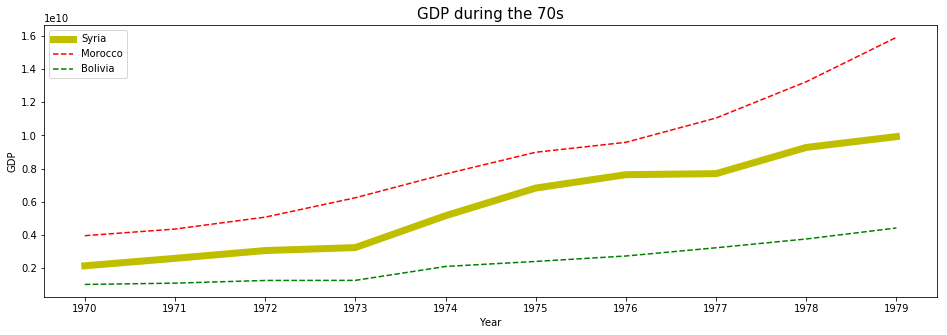

In [22]:
plt.figure(figsize=(16,5))
plt.plot(df_syria_70s["GDP_(current_US)"], c="y", label= "Syria",linewidth=7,)
plt.plot(df_morocco_70s["GDP_(current_US)"], "r--", label = "Morocco")
plt.plot(df_bolivia_70s["GDP_(current_US)"], "g--", label = "Bolivia")
plt.title("GDP during the 70s", fontsize = 15)
plt.legend()
plt.ylabel("GDP")
plt.xlabel("Year")

plt.show()


In the 70s, Syria (blue line) was between Morocco and Bolivia by GDP per Capita.

### Let's see how the conflict makes population sink in Syria.

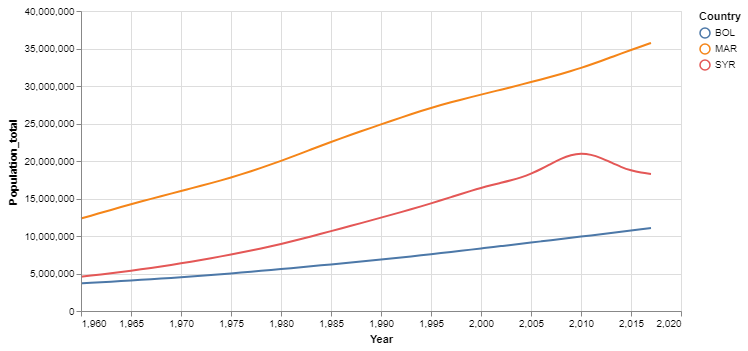

In [23]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="Population_total", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "Population_total", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

* **Download the notebook to play with this Altair interactive chart above and the followings**



Another interessant indicator to see how a country is developing are its CO2 emissions. Let's see if this is also correlated with the conflict. 

** CO2 emissions have been oversized in order to get a clearer visualization.

We can also appreciate that Urban population has been more affected by the conflict than Rural population.

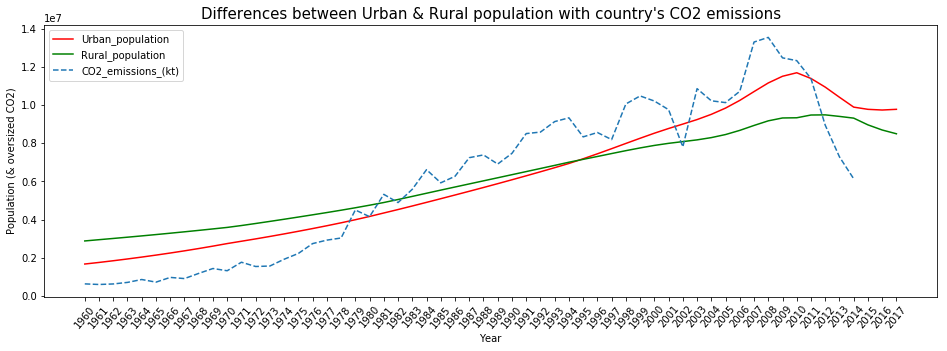

In [24]:
plt.figure(figsize=(16,5))
plt.plot(df_syria["Urban_population"], c="r")
plt.plot(df_syria["Rural_population"], c="g")
plt.plot(df_syria["CO2_emissions_(kt)"]*200, "--")
plt.xticks(rotation=50)
plt.title("Differences between Urban & Rural population with country's CO2 emissions", fontsize = 15)
plt.legend()
plt.ylabel("Population (& oversized CO2)")
plt.xlabel("Year")

plt.show()

As in the other countries, urban population keeps growing as expected in the rest of the world, Syrian population starts to fall. This "expected for the rest of the world" is what we want to predict with this exercise.

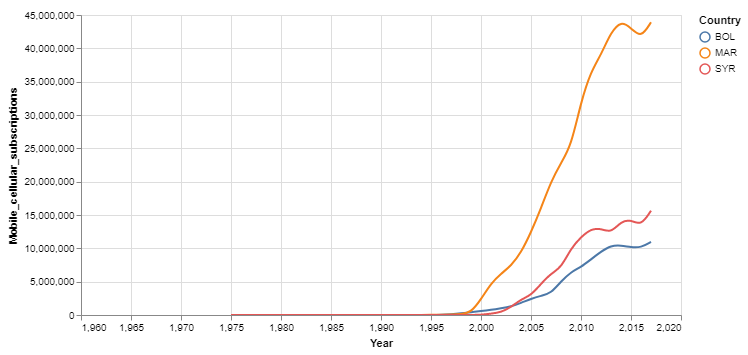

In [25]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="Mobile_cellular_subscriptions", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "Mobile_cellular_subscriptions", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

Mobile subscriptions do not fall during the conflict.



Wars do not make easy to bring data, and that is what happened for Syrian GDP per capita after the start of the war. We will try to full this lack of data using our latinamerican and african countries.

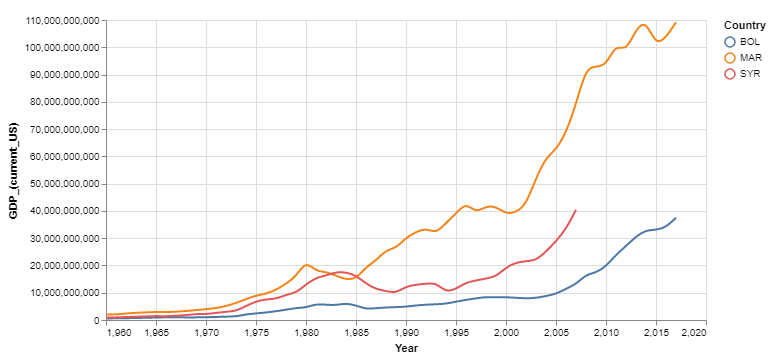

In [26]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

In 2007 with the start of the conflict we begin to loose data coming from Syria.

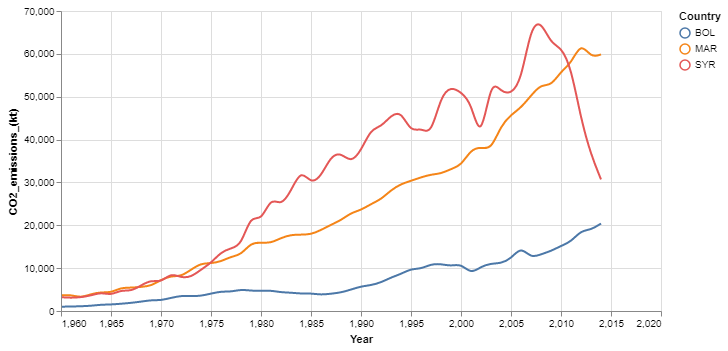

In [29]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="CO2_emissions_(kt)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "CO2_emissions_(kt)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

Here can we see how CO2 emissions strongly falls after 2007.

### Let's stop with chart lines and dive into the correlations that explain situation in Syria after the war.

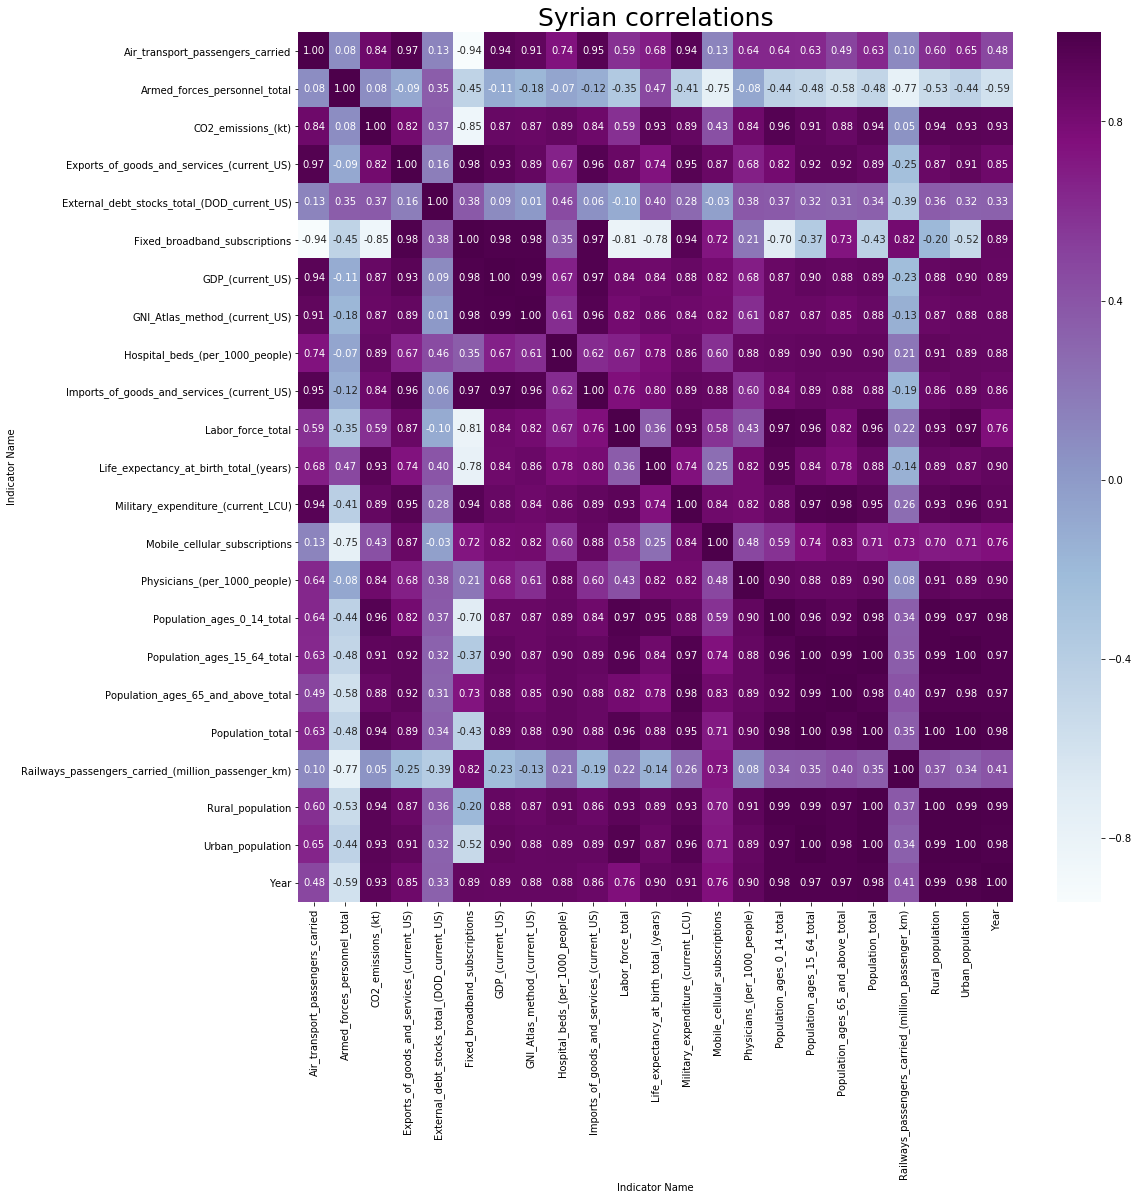

In [30]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df_syria.corr(),annot=True,fmt='.2f',cmap='BuPu')
plt.title("Syrian correlations", fontsize = 25)
plt.show()

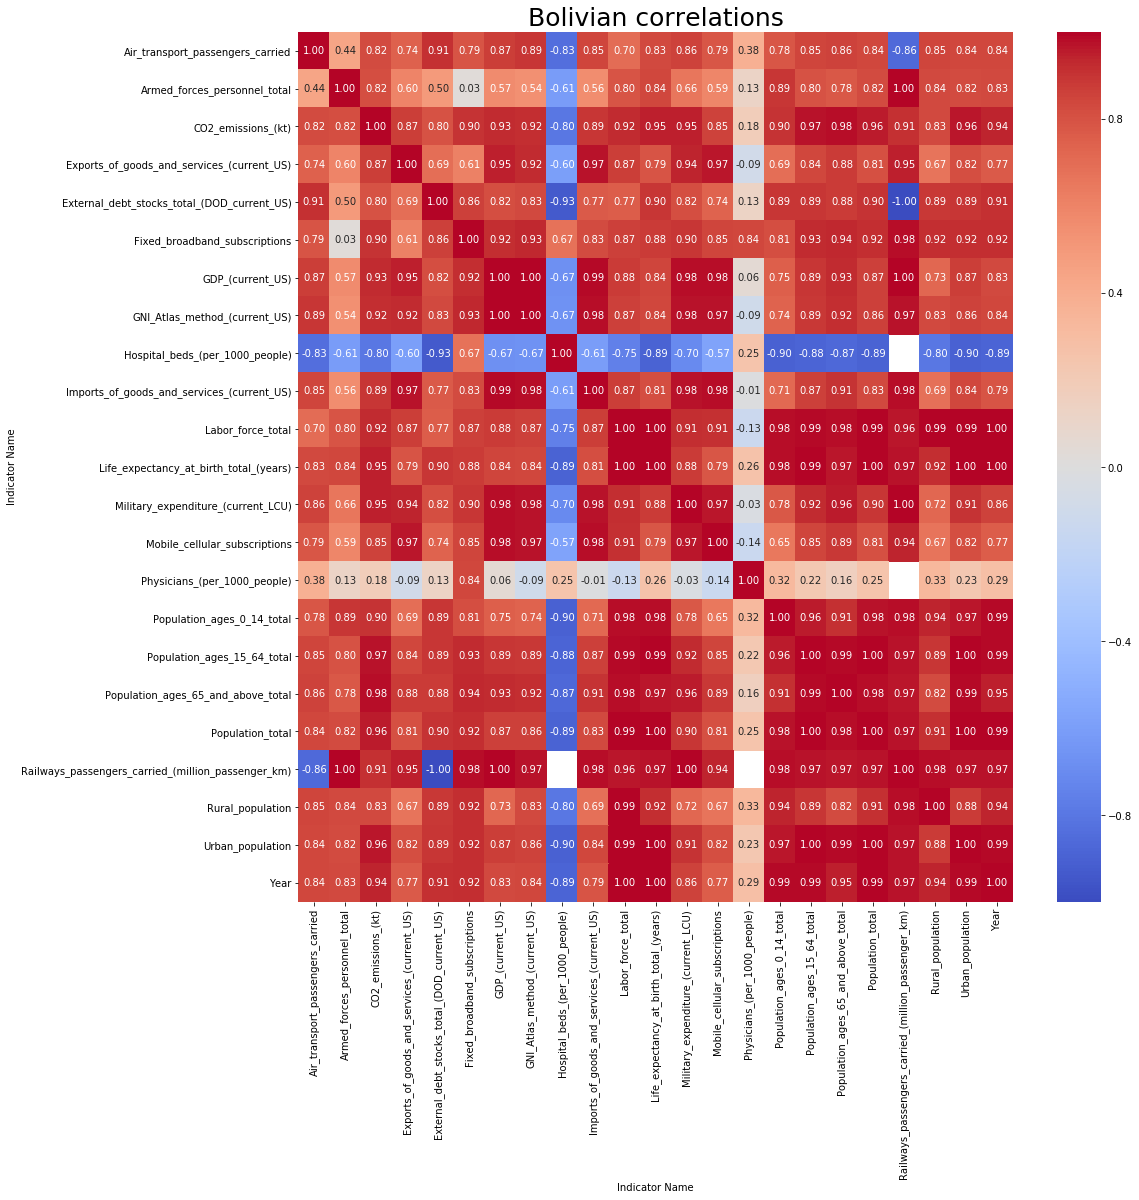

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df_bolivia.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Bolivian correlations", fontsize = 25)
plt.show()

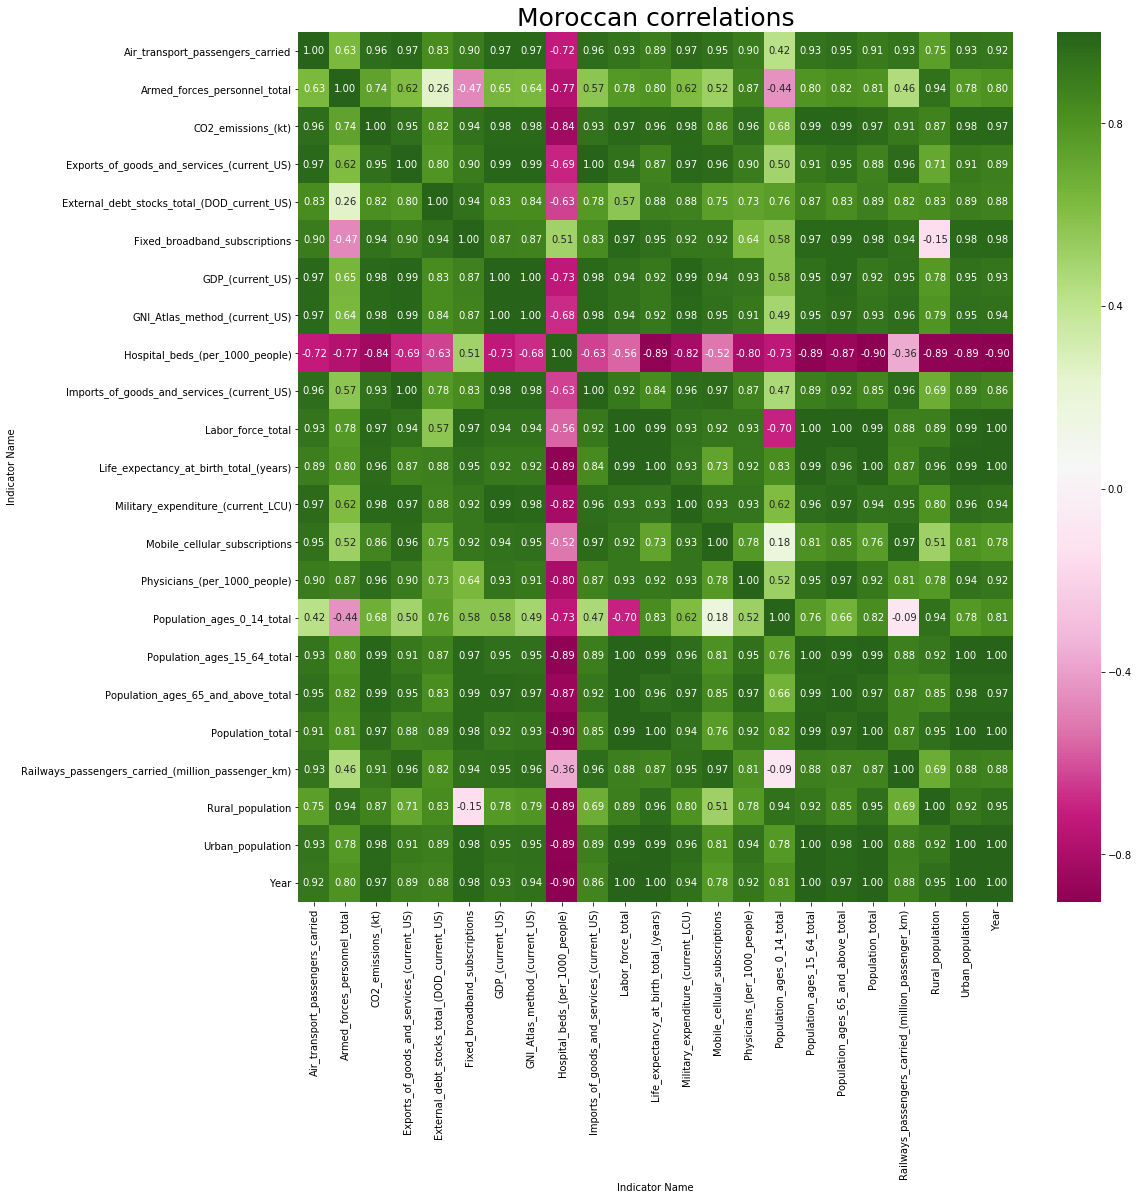

In [32]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df_morocco.corr(),annot=True,fmt='.2f',cmap='PiYG')
plt.title("Moroccan correlations", fontsize = 25)
plt.show()

It is surprising how bad the healthcare indicators correlate with the other ones, specially in the case of Bolivia.
Besides that, our data are not complete so we should look at those indicator from which have historic data.

As expected, GDP correlates high with indicators such as CO2 emissions or Mobile cellular subscriptions.

Well, let's save our data to work in our predictions.

In [33]:
df_bolivia.to_csv('C:/Users/Usuario/Desktop/TFM/bolivia_clean.csv')
df_syria.to_csv('C:/Users/Usuario/Desktop/TFM/syria_clean.csv')
df_morocco.to_csv('C:/Users/Usuario/Desktop/TFM/morocco_clean.csv')